# Demo Alerts 🚨

In [1]:
import os 
from os.path import join, dirname 


PATH_REPO = dirname(os.getcwd())
PATH_DATA = join(PATH_REPO, 'data')
PATH_UTILS = join(PATH_REPO, 'src')

import sys

sys.path.append(PATH_REPO)
#sys.path.append(PATH_UTILS)

from src import time_series
from src import preprocess
from src import summarize
from src import top_terms_extractor
from src import top_trends
from src import preprocesser
import pandas as pd
import numpy as np

## 1.Load the data 📚

- You have to set the PATH_DATA
- Then specify the name_data as the name of the datafile without the extension. The data that you read should be in a csv file.
- If the data is in excel you can then use the function -> [pd.read_excel](https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html)

In [2]:
name_data =  'immigration-ie'#'Congo virus - Pakistan - Data (1)'
data = pd.read_csv(join(PATH_DATA, f'{name_data}.csv'))

data.head(5)

,id,text,created_at,lang,source,name,screen_name,bio,us_created_at,followers_count,friends_count,statuses_count,favourites_count,country,country_code,locality,region,sub_region,coordinates
0,1674564893696045065,@GoldingBF Giorgia is halting the migrant boat...,2023-06-29T23:45:57+00:00,en,twitter,John Mitchell,@JohnMit15280981,Computing with Artificial Intelligence Machine...,2021-01-02T13:44:00+00:00,47,93,3950,1324,Ireland,IE,NaN,NaN,NaN,"53.0, -8.0"
1,1674559792147251200,@andyw8924 @Patriot6112 He should take a good ...,2023-06-29T23:25:40+00:00,en,twitter,Maureen Dalby,@MaureenDalby,Anglo-Irish. Love animals and living in rural ...,2018-10-12T08:11:27+00:00,30174,25651,79003,299967,Ireland,IE,NaN,NaN,NaN,"53.0, -8.0"
2,1674559366295429120,@hennessy_ro @kelehan_kevin3 It's a fact that ...,2023-06-29T23:23:59+00:00,en,twitter,🇮🇪Taxi Dave🇮🇪,@DublinTaxiDave,"🇮🇪🇮🇪🇮🇪Proud co-founder of ""Irish Taxi Drivers ...",2022-12-26T18:35:33+00:00,2526,3011,8323,11866,Ireland,IE,Dublin,Leinster,Dublin City,"53.33306, -6.24889"
3,1674557580473950210,@FlowersEnglish And not a single question abou...,2023-06-29T23:16:53+00:00,en,twitter,Maureen Dalby,@MaureenDalby,Anglo-Irish. Love animals and living in rural ...,2018-10-12T08:11:27+00:00,30174,25651,79003,299967,Ireland,IE,NaN,NaN,NaN,"53.0, -8.0"
4,1674556825914466305,@gavreilly Why don't you report on something t...,2023-06-29T23:13:53+00:00,en,twitter,karlosdub,@Karlosdub,NaN,2009-11-07T17:32:44+00:00,142,201,7063,18676,Ireland,IE,Dublin,Leinster,Dublin City,"53.33306, -6.24889"


## 2. Create Time Series 📈

As you can see above the data is stored with different tweets and sort by data.

Let's transform this data into a time series with 2 variables: the **date** and the **number of tweets per day**

In [3]:
if 'date' not in data.columns:
    data['date'] = data['created_at'].apply(lambda x: x[:10])
data_count = preprocess.data2timeSeries(data)

ts = data_count.loc[:,'text']
dates = ts.index
threshold = 5

ts_anomaly = time_series.AnomalyTS(ts, dates, 20)


# 3. Detect Alerts 🚨

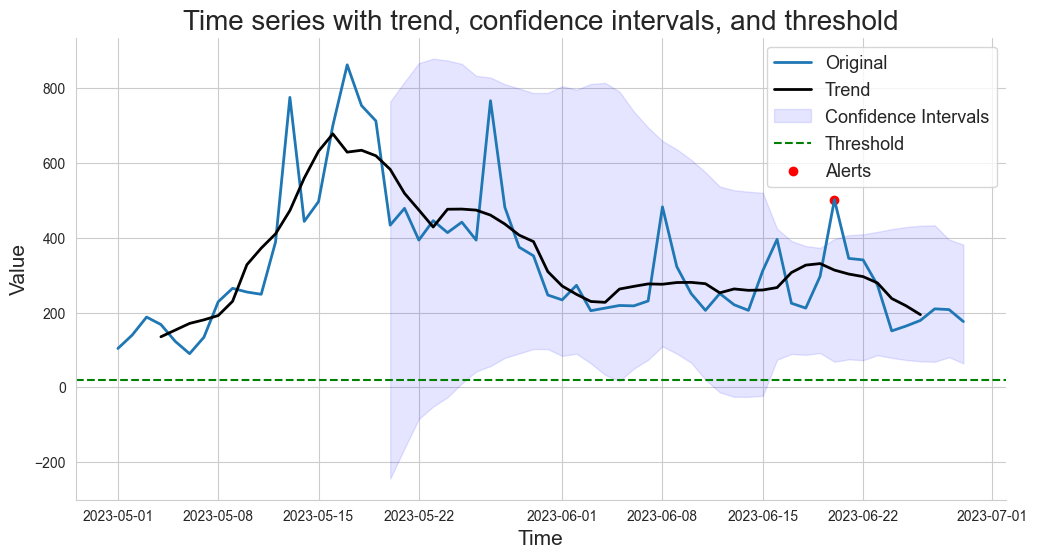

In [4]:
alerts_day = ts_anomaly.detect_alerts()
ts_anomaly.plot()

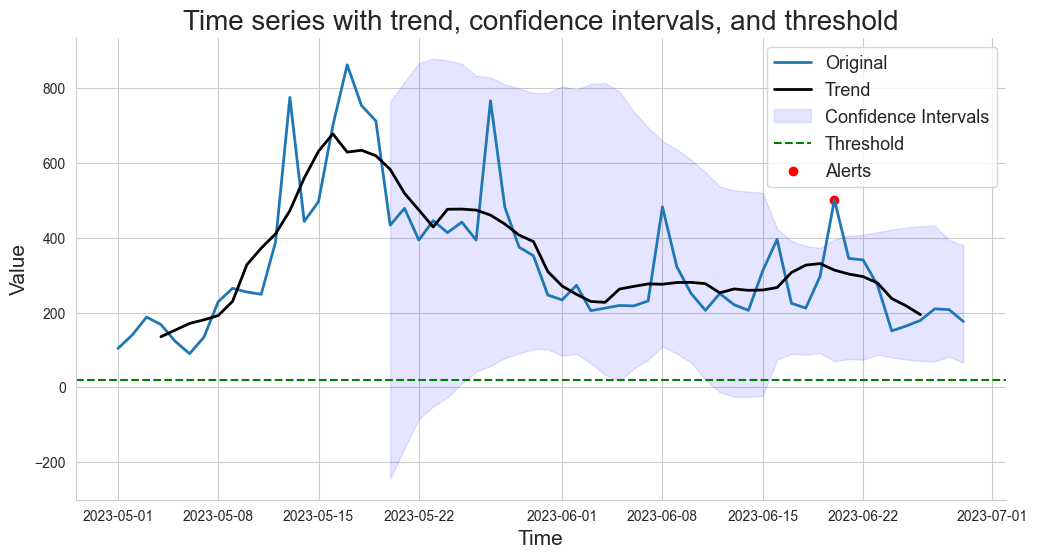

In [5]:
alerts_day = ts_anomaly.detect_alerts()
ts_anomaly.plot()

## 4. Extract Narratives ✍️

In [10]:
ab_preprocess = preprocesser.PreProcesser()
data.loc[:,'text_clean'] = data.loc[:,'text'].apply(lambda x: ab_preprocess(x)['text'])
data

,id,text,created_at,lang,source,name,screen_name,bio,us_created_at,followers_count,...,statuses_count,favourites_count,country,country_code,locality,region,sub_region,coordinates,date,text_clean
0,1674564893696045065,@GoldingBF Giorgia is halting the migrant boat...,2023-06-29T23:45:57+00:00,en,twitter,John Mitchell,@JohnMit15280981,Computing with Artificial Intelligence Machine...,2021-01-02T13:44:00+00:00,47,...,3950,1324,Ireland,IE,NaN,NaN,NaN,"53.0, -8.0",2023-06-29,Giorgia is halting the migrant boats. Stemming...
1,1674559792147251200,@andyw8924 @Patriot6112 He should take a good ...,2023-06-29T23:25:40+00:00,en,twitter,Maureen Dalby,@MaureenDalby,Anglo-Irish. Love animals and living in rural ...,2018-10-12T08:11:27+00:00,30174,...,79003,299967,Ireland,IE,NaN,NaN,NaN,"53.0, -8.0",2023-06-29,He should take a good look at the ongoing migr...
2,1674559366295429120,@hennessy_ro @kelehan_kevin3 It's a fact that ...,2023-06-29T23:23:59+00:00,en,twitter,🇮🇪Taxi Dave🇮🇪,@DublinTaxiDave,"🇮🇪🇮🇪🇮🇪Proud co-founder of ""Irish Taxi Drivers ...",2022-12-26T18:35:33+00:00,2526,...,8323,11866,Ireland,IE,Dublin,Leinster,Dublin City,"53.33306, -6.24889",2023-06-29,It's a fact that the Indigenous Irish will be ...
3,1674557580473950210,@FlowersEnglish And not a single question abou...,2023-06-29T23:16:53+00:00,en,twitter,Maureen Dalby,@MaureenDalby,Anglo-Irish. Love animals and living in rural ...,2018-10-12T08:11:27+00:00,30174,...,79003,299967,Ireland,IE,NaN,NaN,NaN,"53.0, -8.0",2023-06-29,And not a single question about how the migran...
4,1674556825914466305,@gavreilly Why don't you report on something t...,2023-06-29T23:13:53+00:00,en,twitter,karlosdub,@Karlosdub,NaN,2009-11-07T17:32:44+00:00,142,...,7063,18676,Ireland,IE,Dublin,Leinster,Dublin City,"53.33306, -6.24889",2023-06-29,Why don't you report on something that matters...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19828,1652901011420266501,Garda National Immigration Bureau in Dublin is...,2023-05-01T05:01:25+00:00,en,twitter,Garda Immigration Q,@gnibq,UNOFFICIAL! Service of http://t.co/W9RXNP9tSy ...,2014-03-29T17:43:07+00:00,167,...,3467,38,Ireland,IE,Dublin,Leinster,Dublin City,"53.33306, -6.24889",2023-05-01,Garda National Immigration Bureau in Dublin is...
19829,1652858264630050816,@elonmusk Immigration would be crazy being abl...,2023-05-01T02:11:33+00:00,en,twitter,John,@johnbyrne316,@irelandfootball fan. Supporter of the league ...,2021-04-20T22:46:50+00:00,16,...,558,3744,Ireland,IE,NaN,NaN,NaN,"53.0, -8.0",2023-05-01,Immigration would be crazy being able to just ...
19830,1652843033438633987,"@thecolbyday @raiganburns Something, something...",2023-05-01T01:11:02+00:00,en,twitter,Nick Reineke,@RockLeeSmile,Indie game lover! YT & Twitch partner & Indie ...,2010-11-09T16:45:55+00:00,28025,...,89084,95835,Ireland,IE,NaN,NaN,NaN,"53.0, -8.0",2023-05-01,"Something, something, AI integration!"
19831,1652826935959990274,"I really disagree with this opinion, which I k...",2023-05-01T00:07:04+00:00,en,twitter,Bygone Era Bigot,@PunishedPat1641,"Man of the hour, too sweet to be sour. The wom...",2023-01-08T17:08:31+00:00,881,...,7643,13605,Ireland,IE,NaN,NaN,NaN,"53.0, -8.0",2023-05-01,"I really disagree with this opinion, which I k..."


### 4.1 Keywords based method

- topterms
- trends


In [13]:
import nltk
from datetime import datetime, timedelta

nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
stop.extend(stopwords.words('spanish'))
stop.extend(stopwords.words('portuguese'))
stop.extend(stopwords.words('french'))
stop.extend(['https', 'https co', 'mim', 'gran', 'co', 'si', 'pra', 'cada', 'ser', 'va', '21', '2021', '10', 'solo', 'puede', 'siempre',
                'así', 'día', '19', 'biz', 'vai', 'tipo', 'ver', 'bien', 'mal'])

#stop.extend(list_words)

top_terms_processer = top_terms_extractor.top_terms_extractor(stop_words = stop)
for alert_day in alerts_day:
    print(f'Alert of day: {alert_day.date}')
    texts_past_day = summarize.select_texts_per_day(data, alert_day - timedelta(days=1))
    texts = summarize.select_texts_per_day(data, alert_day, text_column='text')
    top_terms = top_terms_processer.compute_top_terms(texts=texts, n=10)
    trends = top_trends.top_trends_tweets(texts_past_day, texts)
    print(f'Top terms of {alert_day} are: \n {top_terms}')
    print(f'The trends of {alert_day} are: \n {trends}')
    

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/alejandrobonell/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Alert of day: <built-in method date of Timestamp object at 0x149496cc0>
Top terms of 2023-06-20 00:00:00 are: 
 {'people': 0.16533864541832669, 'worldrefugeeday': 0.12350597609561753, 'migrant': 0.11752988047808766, 'human trafficking': 0.11155378486055777, 'ireland': 0.10756972111553784, 'immigration': 0.09760956175298804, 'support': 0.08565737051792828, 'asylum seekers': 0.07569721115537849, 'integration': 0.07370517928286853, 'irish': 0.0697211155378486}
The trends of 2023-06-20 00:00:00 are: 
 {'human trafficking': {'freq_rate': 4.521912350597609, 'freq': 0.11155378486055777}, 'refugees welcome': {'freq_rate': 1.2482071713147411, 'freq': 0.037848605577689244}, 'refugees ireland': {'freq_rate': 2.8456175298804784, 'freq': 0.025896414342629483}, 'around world': {'freq_rate': 1.3665338645418326, 'freq': 0.00796812749003984}}


### 4.2 Topic Modelling

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation


def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()


vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=1000, stop_words='english')
lda = LatentDirichletAllocation(n_components=5, max_iter=5, learning_method='online', learning_offset=50.,random_state=0)


for alert_day in alerts_day:
    print(f'Alert of day: {alert_day}')
    texts = summarize.select_texts_per_day(data, alert_day, text_column='text')
    X = vectorizer.fit_transform(texts)

# Let's perform LDA for topic modelling
    lda.fit(X)

    print_top_words(lda, vectorizer.get_feature_names_out(), 10)
    print('\n---- \n')



Alert of day: 2023-06-20 00:00:00
Topic #0: https refugees people worldrefugeeday amp world refugee day today ireland
Topic #1: refugees immigration ireland https welcome hazechu lecheilednd integration masi_asylum time
Topic #2: eu integration peace defence need basis provide civil amp requires
Topic #3: https human trafficking tate migrant charged rape andrew amp women
Topic #4: born attack shocking know terrible refugees people open borders police


---- 



### 4.3 Summarization

In [9]:
import openai
openai.api_key = api_key


for alert_day in alerts_day:
    print(f'Alert of day: {alert_day}')
    texts = summarize.select_texts_per_day(data, alert_day)
    summary = summarize.generate_summarizer(texts)
    print(summary)
    print('\n---- \n')

Alert of day: 2023-06-20 00:00:00
In a recent tweet, @rtenews advocates for opening minds and hearts to welcome refugees into the country. They propose a housing plan that involves the government purchasing land and constructing modular homes for Irish citizens. The plan suggests repayment in monthly installments with an 8% interest rate, potentially allowing the government to profit from housing Irish people. Meanwhile, @Independent_ie counters this viewpoint by asserting that refugees are treated well in Ireland. They argue that concerns arise when individuals fake their refugee status or arrive as

---- 

